In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
data = pd.read_csv('credit_card_clustering.csv')

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis

In [4]:
# How many data are there?

data.shape

(8950, 18)

In [5]:
# How many customers are there?

data ['CUST_ID'].nunique()

8950

In [6]:
data['PURCHASES'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
10%          0.000000
20%          0.000000
30%         89.285000
40%        212.850000
50%        361.280000
60%        557.546000
70%        894.316000
80%       1422.438000
90%       2542.624000
max      49039.570000
Name: PURCHASES, dtype: float64

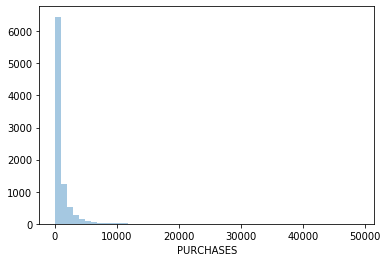

In [7]:
sns.distplot(data['PURCHASES'], kde=False)

In [8]:
data['CASH_ADVANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean       978.871112
std       2097.163877
min          0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%        238.633724
70%        797.272297
80%       1574.933778
90%       3065.534560
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

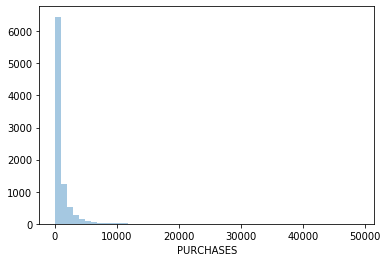

In [9]:
sns.distplot(data['PURCHASES'], kde=False)

In [10]:
data['PAYMENTS'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1733.143852
std       2895.063757
min          0.000000
10%        179.617069
20%        313.141031
30%        459.438287
40%        624.268198
50%        856.901546
60%       1185.259270
70%       1604.092113
80%       2314.017654
90%       3923.906642
max      50721.483360
Name: PAYMENTS, dtype: float64

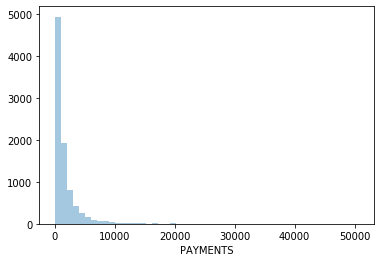

In [11]:
sns.distplot(data['PAYMENTS'], kde=False)

# Clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [14]:
# Get features we need

features = ['PURCHASES','CASH_ADVANCE','PAYMENTS']
X = data[features]


# Choosing Optimal k

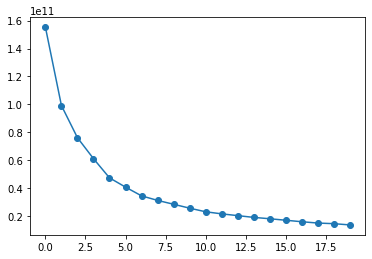

In [15]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use k=4.

In [16]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters = 4, random_state = 42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [17]:
new_data.head()

,PURCHASES,CASH_ADVANCE,PAYMENTS,labels
0,95.40,0.000000,201.802084,3
1,0.00,6442.945483,4103.032597,2
2,773.17,0.000000,622.066742,3
3,1499.00,205.788017,0.000000,3
4,16.00,0.000000,678.334763,3


# Plot centers and labels

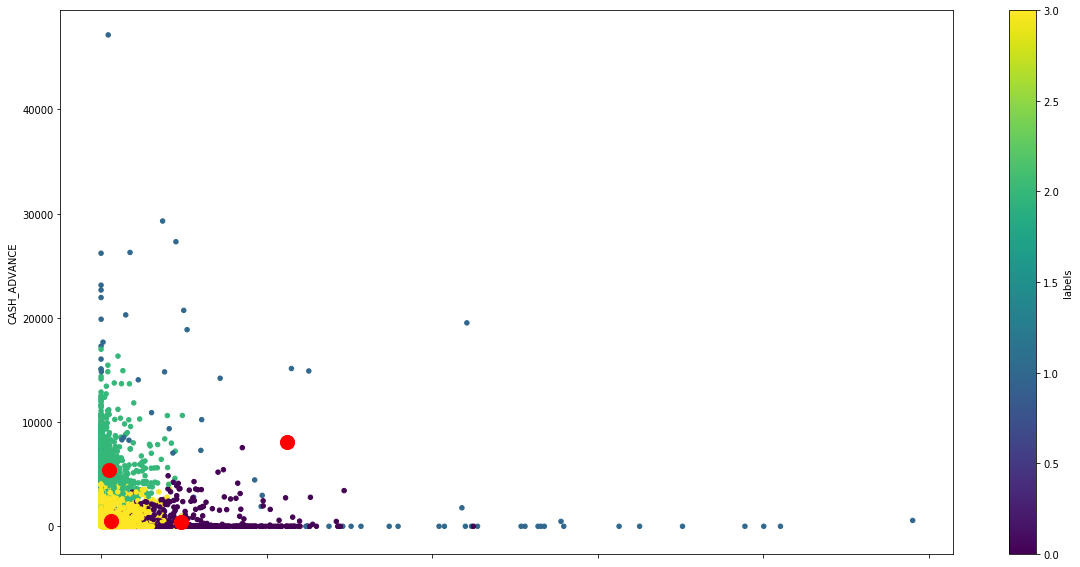

In [18]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='PURCHASES', 
                      y='CASH_ADVANCE', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='red')

# Deep Dive to each cluster

In [19]:
# Transactors
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,PURCHASES,CASH_ADVANCE,PAYMENTS,labels
count,688.000000,688.000000,688.000000,688.0
mean,4816.329186,406.043711,5255.712189,0.0
std,2719.447588,923.297323,2655.446743,0.0
min,0.000000,0.000000,0.000000,0.0
25%,3200.375000,0.000000,3497.308058,0.0
50%,4237.575000,0.000000,4520.155152,0.0
75%,5823.487500,231.037849,6430.943209,0.0
max,22500.000000,7540.307350,17194.627560,0.0


In [20]:
# Prime customers
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,PURCHASES,CASH_ADVANCE,PAYMENTS,labels
count,75.000000,75.000000,75.000000,75.0
mean,11237.783333,8115.052323,23352.857817,1.0
std,12655.111831,9803.696742,7902.219570,0.0
min,0.000000,0.000000,12487.368150,1.0
25%,281.085000,0.000000,17657.573385,1.0
50%,5197.220000,4446.461559,20873.221940,1.0
75%,21274.970000,14866.495960,27547.415530,1.0
max,49039.570000,47137.211760,50721.483360,1.0


In [21]:
# Revolvers
cluster_1 = new_data[new_data['labels']==2]
cluster_1.describe()

,PURCHASES,CASH_ADVANCE,PAYMENTS,labels
count,802.000000,802.000000,802.000000,802.0
mean,492.119751,5368.125051,4204.344349,2.0
std,807.010150,2556.465323,3013.135191,0.0
min,0.000000,988.385871,0.000000,2.0
25%,0.000000,3674.140962,1915.871580,2.0
50%,67.270000,4702.579386,3414.182107,2.0
75%,717.075000,6446.921772,5810.164959,2.0
max,4911.410000,16981.846770,15843.681360,2.0


In [22]:
# Maintaining good credit line
cluster_1 = new_data[new_data['labels']==3]
cluster_1.describe()

,PURCHASES,CASH_ADVANCE,PAYMENTS,labels
count,7385.000000,7385.000000,7385.000000,7385.0
mean,599.530804,483.097247,917.042517,3.0
std,747.708507,832.242567,811.148936,0.0
min,0.000000,0.000000,0.000000,3.0
25%,43.250000,0.000000,323.875395,3.0
50%,318.410000,0.000000,663.167426,3.0
75%,865.940000,689.701740,1307.099065,3.0
max,5359.020000,4447.636548,5403.894447,3.0
